In [ ]:
# Install PyTorch & TorchVision (already installed, but ensure compatibility)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

# Install other necessary dependencies
!pip install timm roboflow

# Install Detectron2 from the source (specific version for Colab)
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidi

In [ ]:
!pip install roboflow


In [ ]:
from roboflow import Roboflow

# Initialize Roboflow with your API key (optional)
rf = Roboflow(api_key="GKQMUqTHZSPFNabY1rZm")  # If you don't have an API key, remove this line

# Load the dataset
project = rf.workspace("kueranan").project("microplastic_100")
dataset = project.version(15).download("coco")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to microplastic_100-15 in coco:: 100%|██████████| 406/406 [00:00<00:00, 2165.40it/s]


In [ ]:
import os

# Define the dataset directory
dataset_path = "/content/microplastic_100-15"

# Check the files in the dataset directory
print("Dataset files:", os.listdir(dataset_path))

# Verify the annotations
annotations_path = os.path.join(dataset_path, "train", "_annotations.coco.json")
print("\nAnnotation file path:", annotations_path)

# Verify the images
images_path = os.path.join(dataset_path, "train")
print("\nNumber of images in train set:", len(os.listdir(images_path)))


Dataset files: ['README.roboflow.txt', 'valid', 'train', 'README.dataset.txt']

Annotation file path: /content/microplastic_100-15/train/_annotations.coco.json

Number of images in train set: 321


In [ ]:
!pip install numpy matplotlib opencv-python albumentations torch torchvision pycocotools tqdm
!pip install timm
import torch
import torchvision
import albumentations as A
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from pycocotools.coco import COCO
import cv2
import numpy as np
import os
import json



A new version of Albumentations is available: '2.0.8' (you have '2.0.7'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


In [ ]:
# Install required libraries
!pip install torch torchvision albumentations pycocotools -q
!pip install effdet -q  # EfficientDet model
!pip install fiftyone -q  # To visualize dataset if needed


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.4/301.4 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.0/943.0 kB 48.5 MB/s eta 0

In [ ]:
class MicroplasticDataset(Dataset):
    def __init__(self, root, annotation_file, transforms=None):
        self.root = root
        self.transforms = transforms
        self.coco = COCO(annotation_file)
        self.image_ids = list(self.coco.imgs.keys())

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, index):
        image_id = self.image_ids[index]
        image_info = self.coco.imgs[image_id]
        image_path = os.path.join(self.root, image_info["file_name"])

        # Load image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0

        # Load annotations
        annotations = self.coco.loadAnns(self.coco.getAnnIds(imgIds=image_id))
        boxes = []
        labels = []

        for ann in annotations:
            xmin = ann["bbox"][0]
            ymin = ann["bbox"][1]
            width = ann["bbox"][2]
            height = ann["bbox"][3]
            boxes.append([xmin, ymin, xmin + width, ymin + height])
            labels.append(ann["category_id"])

        # Convert to tensors
        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)
        target = {"boxes": boxes, "labels": labels, "image_id": torch.tensor([image_id])}

        # Apply transforms
        if self.transforms:
            sample = self.transforms(image=image, bboxes=boxes, labels=labels)
            image = sample["image"]
            target["boxes"] = torch.tensor(sample["bboxes"], dtype=torch.float32)

        return image, target


In [ ]:
def get_transforms():
    return A.Compose([
        A.Resize(640, 640),
        A.HorizontalFlip(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))


In [ ]:
# Set dataset paths
train_root = "/content/microplastic_100-15/train"
valid_root = "/content/microplastic_100-15/valid"
train_annotations = os.path.join(train_root, "_annotations.coco.json")
valid_annotations = os.path.join(valid_root, "_annotations.coco.json")

# Create datasets
train_dataset = MicroplasticDataset(train_root, train_annotations, transforms=get_transforms())
valid_dataset = MicroplasticDataset(valid_root, valid_annotations, transforms=get_transforms())

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
valid_loader = DataLoader(valid_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(valid_dataset)}")


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Train dataset size: 320
Validation dataset size: 80


In [ ]:
!pip install efficientnet_pytorch


  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=c83b46f7d2ea852fc4c727d73b22587f51a91acc554daa134b3b712254f950c4
  Stored in directory: /root/.cache/pip/wheels/8b/6f/9b/231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
Successfully built efficientnet_pytorch


In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision.models.detection import RetinaNet
from torchvision.models.resnet import resnet50, ResNet50_Weights
from torchvision.ops import FeaturePyramidNetwork

# Define BiFPN module
class BiFPN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(BiFPN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        return x

# Define RetinaNet with BiFPN
class RetinaNetWithBiFPN(nn.Module):
    def __init__(self, num_classes):
        super(RetinaNetWithBiFPN, self).__init__()

        # Load ResNet50 as backbone
        backbone = resnet50(weights=ResNet50_Weights.DEFAULT)
        layers = list(backbone.children())[:-2]  # Remove fully connected layer
        self.backbone = nn.Sequential(*layers)
        self.backbone.out_channels = 2048  # Set output channels for RetinaNet

        # Feature Pyramid Network (FPN)
        self.fpn = FeaturePyramidNetwork([256, 512, 1024, 2048], 256)

        # BiFPN layer
        self.bifpn = BiFPN(in_channels=256, out_channels=256)

        # RetinaNet model
        self.retinanet = RetinaNet(self.backbone, num_classes=num_classes)

    def forward(self, images, targets=None):
        features = self.retinanet.backbone(images)  # Extract features from backbone
        features = self.fpn(features)  # Apply FPN
        features = {k: self.bifpn(v) for k, v in features.items()}  # Apply BiFPN
        return self.retinanet(images, targets)

# Define number of classes (4 microplastic classes + 1 background)
num_classes = 4 + 1

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RetinaNetWithBiFPN(num_classes).to(device)

print("Model initialized successfully!")



Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 147MB/s]


Model initialized successfully!


In [ ]:
import json

# Load COCO annotations
coco_path = "/content/microplastic_100-15/train/_annotations.coco.json"  # Update path if needed
with open(coco_path, "r") as f:
    coco_data = json.load(f)

# Extract class names
categories = coco_data["categories"]
class_to_idx = {cat["name"]: cat["id"] for cat in categories}

print("Class Mapping:", class_to_idx)  # Debugging: Check class-to-index mapping


Class Mapping: {'microplastic': 0, 'fiber': 1, 'film': 2, 'fragment': 3, 'pallet': 4}


In [ ]:
# Updated function to format targets correctly
def collate_fn(batch):
    images, targets = zip(*batch)

    formatted_targets = []
    for target in targets:
        new_annotations = []
        for annotation in target.get("annotations", []):  # Ensure "annotations" exist
            if "category_name" in annotation:
                class_name = annotation["category_name"]
                if class_name in class_to_idx:
                    annotation["category_id"] = int(class_to_idx[class_name])  # Convert to int
                else:
                    print(f"⚠️ Warning: Unknown class '{class_name}' found!")
                    annotation["category_id"] = -1  # Set an invalid category ID for debugging

                new_annotations.append(annotation)

        formatted_targets.append({"annotations": new_annotations})

    return list(images), formatted_targets

# Update DataLoader with collate_fn
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
valid_loader = DataLoader(valid_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

print("✅ DataLoader reloaded!")



✅ DataLoader reloaded!


In [ ]:
# Debugging: Check dataset class mappings
print("Class Mapping:", class_to_idx)

Class Mapping: {'microplastic': 0, 'fiber': 1, 'film': 2, 'fragment': 3, 'pallet': 4}


In [ ]:
# Print available class mappings
print("📌 Available class_to_idx:", class_to_idx)

📌 Available class_to_idx: {'microplastic': 0, 'fiber': 1, 'film': 2, 'fragment': 3, 'pallet': 4}


In [ ]:
import os

dataset_path = "/content/microplastic_100-15"  # Change this to your dataset folder

# Check dataset directory structure
print("📂 Checking dataset structure...")
for root, dirs, files in os.walk(dataset_path):
    print(f"📂 Directory: {root}")
    print(f"📄 Files: {files[:5]}")  # Show first 5 files to avoid clutter
    print("-" * 50)



📂 Checking dataset structure...
📂 Directory: /content/microplastic_100-15
📄 Files: ['README.dataset.txt', 'README.roboflow.txt']
--------------------------------------------------
📂 Directory: /content/microplastic_100-15/valid
📄 Files: ['46_png.rf.14ce4c4e2f0842a83871a1ba425a11ba.jpg', '6_png.rf.02cf09e527b737427ae64b77bab51771.jpg', '91_png.rf.5dac7561a880722fb8dbad603e98efbd.jpg', '79_png.rf.90f2a6638b01b2d964c7174038dbbbf8.jpg', '68_png.rf.5164f00a7e62c4581982f67ea19bf75e.jpg']
--------------------------------------------------
📂 Directory: /content/microplastic_100-15/train
📄 Files: ['181-b_png.rf.2ce50b7017afc385603809efac8326a5.jpg', '184-b_png.rf.3464cb93aa975ab17ca9f5008e3576fc.jpg', '353-c_png.rf.dfa981a82b77d49dcd69f9fa378cb3e7.jpg', '399-d_png.rf.f0b3e1e65f20c8b0aeaf6f5c1aaa82ce.jpg', '255-c_png.rf.08ac94eceb0309e213a7b19cc601c197.jpg']
--------------------------------------------------


In [ ]:
!pip install torch torchvision numpy pycocotools albumentations


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CocoDetection

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
])

# Dataset Path
dataset_root = "/content/microplastic_100-15/train"
annotation_file = f"{dataset_root}/_annotations.coco.json"

# Load dataset
train_dataset = CocoDetection(root=dataset_root, annFile=annotation_file, transform=transform)

# DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)

# Check Dataset
print(f"Loaded {len(train_dataset)} images")


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loaded 320 images


In [ ]:
import json

# Dataset Path
dataset_root = "/content/microplastic_100-15/train"
annotation_file = f"{dataset_root}/_annotations.coco.json"

# Load COCO Annotations
with open(annotation_file, 'r') as f:
    coco_data = json.load(f)

# Print basic info
print(f"Total Images: {len(coco_data['images'])}")
print(f"Total Annotations: {len(coco_data['annotations'])}")

# Print a sample image info
print("Sample Image Info:", coco_data["images"][0])

# Print a sample annotation
print("Sample Annotation:", coco_data["annotations"][0])


Total Images: 320
Total Annotations: 3800
Sample Image Info: {'id': 0, 'license': 1, 'file_name': '129-b_png.rf.c59328f552c93fe6b8dbec4f284a81c6.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-07-17T15:45:08+00:00'}
Sample Annotation: {'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [277, 311, 48, 32], 'area': 1536, 'segmentation': [], 'iscrowd': 0}


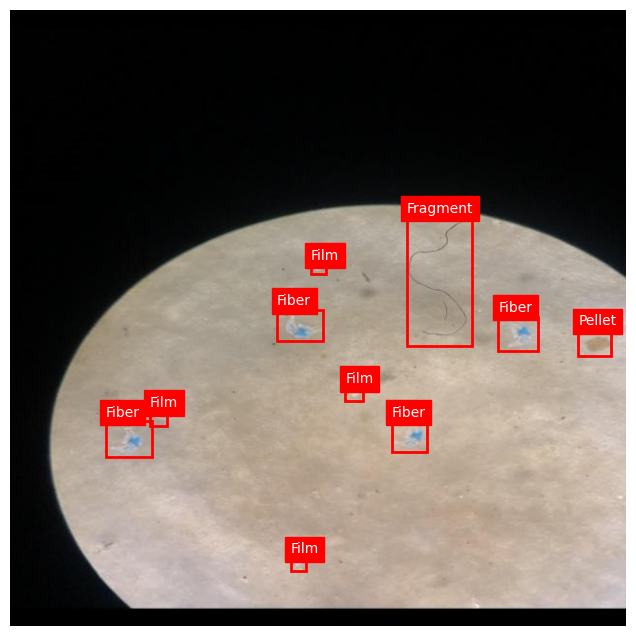

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# Category Mapping (Modify this if needed)
category_mapping = {1: "Fragment", 2: "Fiber", 3: "Pellet", 4: "Film"}

# Function to plot an image with annotations
def plot_image_with_boxes(image_id):
    # Find image metadata
    image_info = next(img for img in coco_data['images'] if img['id'] == image_id)

    # Load image
    image_path = os.path.join(dataset_root, image_info['file_name'])
    image = Image.open(image_path)

    # Get annotations for the image
    annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_id]

    # Plot the image
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image)

    # Draw bounding boxes
    for ann in annotations:
        x, y, w, h = ann['bbox']
        category_id = ann['category_id']
        category_name = category_mapping.get(category_id, f"Class {category_id}")

        # Create a rectangle patch
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        # Add label
        plt.text(x, y - 5, category_name, color='white', fontsize=10, backgroundcolor="red")

    plt.axis("off")
    plt.show()

# Test with the first image
plot_image_with_boxes(0)


In [ ]:
import torch
import torchvision
from torchvision.models.detection.retinanet import RetinaNet
from torchvision.models.detection.anchor_utils import AnchorGenerator
from torchvision.models import resnet50

# Load a pretrained ResNet50 model
backbone = resnet50(pretrained=True)

# Remove the fully connected layer
backbone = torch.nn.Sequential(*list(backbone.children())[:-2])

# Set output channels
backbone.out_channels = 2048  # ResNet50 last feature map channels

# Define anchor sizes & aspect ratios
anchor_generator = AnchorGenerator(
    sizes=((32, 64, 128, 256, 512),),
    aspect_ratios=((0.5, 1.0, 2.0),) * 5
)

# Define the RetinaNet model
model = RetinaNet(backbone=backbone, num_classes=5, anchor_generator=anchor_generator)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Print model summary
print(model)


The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.


RetinaNet(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(6

In [ ]:
import torch
import torchvision
from torchvision.models.detection import retinanet_resnet50_fpn
from torchvision.models.detection import RetinaNet_ResNet50_FPN_Weights

# Load the model with correct weights parameter
model = retinanet_resnet50_fpn(weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print the model architecture to confirm
print(model)



Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:01<00:00, 116MB/s]


RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


In [ ]:

model.eval()

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


In [ ]:
def collate_fn(batch):
    images, targets = zip(*batch)
    images = [img.to(device) for img in images]

    formatted_targets = []
    for target in targets:
        valid_boxes = []
        valid_labels = []

        for obj in target:
            x_min, y_min, width, height = obj["bbox"]

            # Ensure width and height are positive
            x_max = x_min + max(1, width)  # Ensure min width is at least 1
            y_max = y_min + max(1, height)  # Ensure min height is at least 1

            valid_boxes.append([x_min, y_min, x_max, y_max])
            valid_labels.append(obj["category_id"])

        # Convert to tensors
        boxes_tensor = torch.tensor(valid_boxes, dtype=torch.float32).to(device)
        labels_tensor = torch.tensor(valid_labels, dtype=torch.int64).to(device)

        formatted_targets.append({"boxes": boxes_tensor, "labels": labels_tensor})

    return images, formatted_targets



In [ ]:
# Test dataset sample
img, target = train_dataset[0]  # Get the first sample
print("Image shape:", img.size)
print("Target:", target)


Image shape: <built-in method size of Tensor object at 0x7f2521da31d0>
Target: [{'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [277, 311, 48, 32], 'area': 1536, 'segmentation': [], 'iscrowd': 0}, {'id': 1, 'image_id': 0, 'category_id': 2, 'bbox': [396, 427, 36.5, 31.5], 'area': 1149.75, 'segmentation': [], 'iscrowd': 0}, {'id': 2, 'image_id': 0, 'category_id': 2, 'bbox': [507, 318, 41, 35.5], 'area': 1455.5, 'segmentation': [], 'iscrowd': 0}, {'id': 3, 'image_id': 0, 'category_id': 1, 'bbox': [412, 215, 68, 133.5], 'area': 9078, 'segmentation': [], 'iscrowd': 0}, {'id': 4, 'image_id': 0, 'category_id': 2, 'bbox': [99, 427, 48, 36.5], 'area': 1752, 'segmentation': [], 'iscrowd': 0}, {'id': 5, 'image_id': 0, 'category_id': 3, 'bbox': [590, 332, 34, 27.5], 'area': 935, 'segmentation': [], 'iscrowd': 0}, {'id': 6, 'image_id': 0, 'category_id': 4, 'bbox': [312, 264, 15.5, 10], 'area': 155, 'segmentation': [], 'iscrowd': 0}, {'id': 7, 'image_id': 0, 'category_id': 4, 'bbox': [145, 417, 1

In [ ]:
from torch.utils.data import DataLoader

# Define batch size
batch_size = 4

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

print("Dataloaders initialized successfully!")


Dataloaders initialized successfully!


In [ ]:
import torchvision
from torchvision.models.detection import retinanet_resnet50_fpn
import torch

# Load RetinaNet with ResNet50 backbone
model = retinanet_resnet50_fpn(weights="DEFAULT")

# Modify classification head for 4 microplastic classes + 1 background
num_classes = 5  # 4 microplastic classes + background

# Extract input feature size for classification head
in_features = model.head.classification_head.cls_logits.in_channels
num_anchors = model.head.classification_head.num_anchors

# Replace classification head with new number of classes
model.head.classification_head.cls_logits = torch.nn.Conv2d(in_features, num_anchors * num_classes, kernel_size=3, stride=1, padding=1)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("✅ RetinaNet Model Initialized Successfully!")



✅ RetinaNet Model Initialized Successfully!


In [ ]:
import time
import torch
import torch.nn.functional as F

# Training function
def train_one_epoch(model, optimizer, dataloader, device):
    model.train()
    total_loss = 0

    for images, targets in dataloader:
        images = [img.to(device) for img in images]

        # Ensure targets are properly formatted
        formatted_targets = []
        for target in targets:
            formatted_targets.append({
                "boxes": target["boxes"].to(device),
                "labels": target["labels"].to(device)
            })

        # Forward pass
        loss_dict = model(images, formatted_targets)
        loss = sum(loss for loss in loss_dict.values())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f"🔹 Training Loss: {avg_loss:.4f}")
    return avg_loss



In [ ]:
from torch.optim.lr_scheduler import StepLR

# Define optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Learning rate scheduler
lr_scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


## Faster-RCNN-RESNET50-FPN

In [ ]:
!pip install torch torchvision pycocotools
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import time


In [ ]:
# Define the dataset transformations
transform = transforms.Compose([
    transforms.Resize((640, 640)),  # or larger, based on GPU memory
    transforms.ToTensor(),  # Convert images to tensors
])

# Load COCO dataset
train_dataset = datasets.CocoDetection(
    root="/content/microplastic_100-15/train",
    annFile="/content/microplastic_100-15/train/_annotations.coco.json",
    transform=transform
)

val_dataset = datasets.CocoDetection(
    root="/content/microplastic_100-15/valid",
    annFile="/content/microplastic_100-15/valid/_annotations.coco.json",
    transform=transform
)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
def collate_fn(batch):
    images, targets = zip(*batch)
    images = [img.to(device) for img in images]

    formatted_targets = []
    for target in targets:
        valid_boxes = []
        valid_labels = []

        for obj in target:
            x_min, y_min, width, height = obj["bbox"]

            # Ensure valid bounding box values
            x_min = max(0, x_min)
            y_min = max(0, y_min)
            width = max(1, width)  # Ensure at least 1px width
            height = max(1, height)  # Ensure at least 1px height
            x_max = x_min + width
            y_max = y_min + height

            # Check for valid boxes before adding
            if x_max > x_min and y_max > y_min:
                valid_boxes.append([x_min, y_min, x_max, y_max])
                valid_labels.append(obj["category_id"])

        # If no valid boxes exist, add a dummy one
        if not valid_boxes:
            valid_boxes = [[0, 0, 1, 1]]
            valid_labels = [0]

        # Convert to tensors
        boxes_tensor = torch.tensor(valid_boxes, dtype=torch.float32).to(device)
        labels_tensor = torch.tensor(valid_labels, dtype=torch.int64).to(device)

        formatted_targets.append({"boxes": boxes_tensor, "labels": labels_tensor})

    return images, formatted_targets


In [ ]:
# Define batch size
batch_size = 8

# Create DataLoaders
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn
)


In [ ]:
from torchvision.models.detection.anchor_utils import AnchorGenerator

# Based on your scale histogram (rounded to nearest powers of 2)
custom_sizes = ((16,), (32,), (64,), (128,), (256,))

# Based on your aspect ratio histogram (mostly near 1:1, some wider/taller)
custom_ratios = ((0.5, 1.0, 2.0),) * len(custom_sizes)  # apply same ratios to each FPN level

anchor_generator = AnchorGenerator(sizes=custom_sizes, aspect_ratios=custom_ratios)

from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
from torchvision.models.detection import FasterRCNN

# Load resnet50 backbone with FPN
backbone = resnet_fpn_backbone('resnet50', pretrained=True)

# Plug custom anchor generator into the model
model = FasterRCNN(
    backbone=backbone,
    num_classes=5,  # your case: 4 classes + 1 background
    rpn_anchor_generator=anchor_generator
)

# Send to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [ ]:
# Load only model weights
model.load_state_dict(torch.load("fasterrcnn_microplastics2.pt"))

<All keys matched successfully>

In [ ]:
import torch.optim as optim

# Define optimizer (Adam with weight decay for better generalization)
optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=1e-4)

# Learning rate scheduler (Reduce LR on Plateau to handle plateaus in training)
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)


In [ ]:
import time
import torch.nn.functional as F


def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)

    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    unionArea = float(boxAArea + boxBArea - interArea)

    if unionArea == 0:
        return 0.0
    return interArea / unionArea



def train_one_epoch(model, optimizer, dataloader, device, iou_threshold=0.5):
    model.train()
    running_loss = 0.0
    total_true_positives = 0
    total_gt_objects = 0

    for images, targets in dataloader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Forward pass (training mode returns losses)
        optimizer.zero_grad()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        losses.backward()
        optimizer.step()
        running_loss += losses.item()

        # ---- Evaluate accuracy for this batch (in eval mode) ----
        model.eval()
        with torch.no_grad():
            outputs = model(images)

        for output, target in zip(outputs, targets):
            pred_boxes = output["boxes"].detach().cpu()
            pred_labels = output["labels"].detach().cpu()
            gt_boxes = target["boxes"].detach().cpu()
            gt_labels = target["labels"].detach().cpu()

            matched = set()
            for i, gt_box in enumerate(gt_boxes):
                gt_label = gt_labels[i]
                for j, pred_box in enumerate(pred_boxes):
                    if j in matched:
                        continue
                    iou = compute_iou(gt_box.tolist(), pred_box.tolist())
                    if iou >= iou_threshold and pred_labels[j] == gt_label:
                        total_true_positives += 1
                        matched.add(j)
                        break
            total_gt_objects += len(gt_boxes)
        model.train()

    avg_loss = running_loss / len(dataloader)
    train_accuracy = (total_true_positives / total_gt_objects) if total_gt_objects > 0 else 0.0

    return avg_loss, train_accuracy

def evaluate_on_validation_set(model, dataloader, device, iou_threshold=0.5):
    model.eval()
    running_loss = 0.0
    total_true_positives = 0
    total_gt_objects = 0

    with torch.no_grad():
        for images, targets in dataloader:
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # --- TEMPORARY switch to train mode to compute loss ---
            model.train()
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            running_loss += losses.item()
            model.eval()  # Switch back to eval mode

            # Get predictions
            outputs = model(images)

            for output, target in zip(outputs, targets):
                pred_boxes = output["boxes"].detach().cpu()
                pred_labels = output["labels"].detach().cpu()
                gt_boxes = target["boxes"].detach().cpu()
                gt_labels = target["labels"].detach().cpu()

                matched = set()
                for i, gt_box in enumerate(gt_boxes):
                    gt_label = gt_labels[i]
                    for j, pred_box in enumerate(pred_boxes):
                        if j in matched:
                            continue
                        iou = compute_iou(gt_box.tolist(), pred_box.tolist())
                        if iou >= iou_threshold and pred_labels[j] == gt_label:
                            total_true_positives += 1
                            matched.add(j)
                            break

                total_gt_objects += len(gt_boxes)

    avg_loss = running_loss / len(dataloader)
    val_accuracy = (total_true_positives / total_gt_objects) if total_gt_objects > 0 else 0.0
    return avg_loss, val_accuracy




In [ ]:
import os
best_val_acc = 0.0  # Start with lowest possible accuracy
save_path = "best_model2.pth"  # Change path as needed

num_epochs = 50
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    start_time = time.time()

    train_loss, train_acc = train_one_epoch(model, optimizer, train_loader, device)
    val_loss, val_acc = evaluate_on_validation_set(model, val_loader, device)
    lr_scheduler.step()

    end_time = time.time()

    print(f"Epoch {epoch+1} Summary:")
    print(f"  Train Loss     : {train_loss:.4f}")
    print(f"  Train Accuracy : {train_acc:.4f}")
    print(f"  Val Loss       : {val_loss:.4f}")
    print(f"  Val Accuracy   : {val_acc:.4f}")
    print(f"  Time Taken     : {end_time - start_time:.2f} sec")

    # Save model if val accuracy improves
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"✅ Model saved at epoch {epoch+1} with improved val accuracy: {val_acc:.4f}\n")
    else:
        print(f"ℹ️ No improvement in val accuracy. Best remains: {best_val_acc:.4f}\n")


Epoch 1/50
Epoch 1 Summary:
  Train Loss     : 0.5681
  Train Accuracy : 0.9721
  Val Loss       : 0.5775
  Val Accuracy   : 0.9486
  Time Taken     : 106.42 sec
✅ Model saved at epoch 1 with improved val accuracy: 0.9486

Epoch 2/50
Epoch 2 Summary:
  Train Loss     : 0.5572
  Train Accuracy : 0.9682
  Val Loss       : 0.5765
  Val Accuracy   : 0.9543
  Time Taken     : 105.68 sec
✅ Model saved at epoch 2 with improved val accuracy: 0.9543

Epoch 3/50
Epoch 3 Summary:
  Train Loss     : 0.5589
  Train Accuracy : 0.9716
  Val Loss       : 0.5784
  Val Accuracy   : 0.9532
  Time Taken     : 105.73 sec
ℹ️ No improvement in val accuracy. Best remains: 0.9543

Epoch 4/50


KeyboardInterrupt: 

In [ ]:
model.load_state_dict(torch.load("best_model2.pth"))
model.to(device)
model.eval()  # for inference

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [ ]:
num_epochs=50
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    start_time = time.time()

    train_loss, train_acc = train_one_epoch(model, optimizer, train_loader, device)
    val_loss, val_acc = evaluate_on_validation_set(model, val_loader, device)
    lr_scheduler.step()

    end_time = time.time()
    print(f"Epoch {epoch+1} Summary:")
    print(f"  Train Loss     : {train_loss:.4f}")
    print(f"  Train Accuracy : {train_acc:.4f}")
    print(f"  Val Loss       : {val_loss:.4f}")
    print(f"  Val Accuracy   : {val_acc:.4f}")
    print(f"  Time Taken     : {end_time - start_time:.2f} sec\n")

Epoch 1/50
Epoch 1 Summary:
  Train Loss     : 0.5428
  Train Accuracy : 0.9700
  Val Loss       : 0.5640
  Val Accuracy   : 0.9418
  Time Taken     : 106.64 sec

Epoch 2/50
Epoch 2 Summary:
  Train Loss     : 0.5415
  Train Accuracy : 0.9697
  Val Loss       : 0.5647
  Val Accuracy   : 0.9418
  Time Taken     : 105.97 sec

Epoch 3/50
Epoch 3 Summary:
  Train Loss     : 0.5369
  Train Accuracy : 0.9705
  Val Loss       : 0.5769
  Val Accuracy   : 0.9429
  Time Taken     : 106.13 sec

Epoch 4/50


KeyboardInterrupt: 

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 47.1 MB/s eta 0:00:00


In [ ]:
from collections import defaultdict
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import torch


@torch.no_grad()
def evaluate_val_set(model,
                     dataloader,
                     device,
                     iou_threshold: float = 0.5):
    """
    Returns:
        {
          'mAP'          : float      # COCO, IoU-averaged 0.5:0.95
          'mAP_50'       : float      # IoU = 0.5
          'precision'    : float      # micro, IoU = 0.5
          'recall'       : float      # micro, IoU = 0.5
          'f1'           : float      # micro, IoU = 0.5
          'per_class'    : {cls_id: {'AP': …, 'precision': …, 'recall': …, 'f1': …}}
        }
    """
    model.eval()

    ## ---------- 1. COCO-style evaluator for AP ----------
    coco_metric = MeanAveragePrecision(
        iou_type="bbox",
        iou_thresholds=[iou_threshold],       # still records map_50, map_per_class
        class_metrics=True
    )

    ## ---------- 2. Plain TP / FP / FN counters ----------
    tp_cls = defaultdict(int)
    fp_cls = defaultdict(int)
    fn_cls = defaultdict(int)

    for images, targets in dataloader:
        images  = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        outputs = model(images)

        # ---- (a) update COCO metric ----
        preds_cpu   = [{k: v.cpu() for k, v in o.items()} for o in outputs]
        targets_cpu = [{k: v.cpu() for k, v in t.items()} for t in targets]
        coco_metric.update(preds_cpu, targets_cpu)

        # ---- (b) count TP / FP / FN per class ----
        for pred, gt in zip(outputs, targets):
            p_boxes  = pred["boxes"].detach().cpu()
            p_labels = pred["labels"].detach().cpu()
            g_boxes  = gt["boxes"].detach().cpu()
            g_labels = gt["labels"].detach().cpu()

            matched_pred_idx = set()

            # match GT → prediction (greedy, one-to-one)
            for g_idx, g_box in enumerate(g_boxes):
                g_lab = g_labels[g_idx].item()
                found_match = False
                for p_idx, p_box in enumerate(p_boxes):
                    if p_idx in matched_pred_idx:
                        continue
                    iou = compute_iou(g_box.tolist(), p_box.tolist())
                    if iou >= iou_threshold and p_labels[p_idx] == g_labels[g_idx]:
                        tp_cls[g_lab] += 1
                        matched_pred_idx.add(p_idx)
                        found_match = True
                        break
                if not found_match:
                    fn_cls[g_lab] += 1

            # remaining unmatched predictions are false-positives
            for p_idx, p_lab in enumerate(p_labels):
                if p_idx not in matched_pred_idx:
                    fp_cls[p_lab.item()] += 1

    ## ---------- 3. Aggregate TP / FP / FN ----------
    all_classes = set(tp_cls) | set(fp_cls) | set(fn_cls)
    per_class_stats = {}
    total_tp = total_fp = total_fn = 0

    for c in sorted(all_classes):
        tp = tp_cls[c]
        fp = fp_cls[c]
        fn = fn_cls[c]

        precision_c = tp / (tp + fp + 1e-12)
        recall_c    = tp / (tp + fn + 1e-12)
        f1_c        = 2 * precision_c * recall_c / (precision_c + recall_c + 1e-12)

        per_class_stats[c] = {
            "AP"       : float("nan"),    # will fill from COCO metric below
            "precision": precision_c,
            "recall"   : recall_c,
            "f1"       : f1_c,
        }

        total_tp += tp
        total_fp += fp
        total_fn += fn

    ## ---------- 4. Fetch AP values from TorchMetrics ----------
    coco_res = coco_metric.compute()      # dict of tensors
    # scalar (0-D) → float, otherwise keep tensor
    coco_res = {k: (v.item() if torch.is_tensor(v) and v.ndim == 0 else v)
                for k, v in coco_res.items()}

    # map_per_class is a 1-D tensor (len = #classes encountered)
    if "map_per_class" in coco_res and coco_res["map_per_class"] is not None:
        for cls, ap in zip(coco_res["classes"].tolist(),
                           coco_res["map_per_class"].tolist()):
            if cls in per_class_stats:
                per_class_stats[cls]["AP"] = ap

    ## ---------- 5. Micro-averaged metrics ----------
    precision_micro = total_tp / (total_tp + total_fp + 1e-12)
    recall_micro    = total_tp / (total_tp + total_fn + 1e-12)
    f1_micro        = 2 * precision_micro * recall_micro / (
                         precision_micro + recall_micro + 1e-12)

    return {
        "mAP"        : coco_res["map"],
        "mAP_50"     : coco_res["map_50"],
        "precision"  : precision_micro,
        "recall"     : recall_micro,
        "f1"         : f1_micro,
        "per_class"  : per_class_stats,
    }


metrics = evaluate_val_set(model, val_loader, device)

print(f"mAP  (0.5:0.95): {metrics['mAP']:.4f}")
print(f"mAP@0.5       : {metrics['mAP_50']:.4f}")
print(f"Precision      : {metrics['precision']:.4f}")
print(f"Recall         : {metrics['recall']:.4f}")
print(f"F1 score       : {metrics['f1']:.4f}\n")

print("Per-class metrics:")
for cls, s in metrics["per_class"].items():
    print(f"  class {cls:2d} | AP: {s['AP']:.3f}  "
          f"P: {s['precision']:.3f}  R: {s['recall']:.3f}  F1: {s['f1']:.3f}")


mAP  (0.5:0.95): 0.8948
mAP@0.5       : 0.8948
Precision      : 0.6557
Recall         : 0.9543
F1 score       : 0.7773

Per-class metrics:
  class  1 | AP: 0.987  P: 0.892  R: 0.996  F1: 0.941
  class  2 | AP: 0.951  P: 0.969  R: 0.969  F1: 0.969
  class  3 | AP: 0.880  P: 0.713  R: 0.939  F1: 0.810
  class  4 | AP: 0.761  P: 0.370  R: 0.906  F1: 0.526


In [ ]:
from collections import defaultdict
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import torch


@torch.no_grad()
def evaluate_val_set(model,
                     dataloader,
                     device,
                     iou_threshold: float = 0.5):
    """
    Returns:
        {
          'mAP'          : float      # COCO, IoU-averaged 0.5:0.95
          'mAP_50'       : float      # IoU = 0.5
          'precision'    : float      # micro, IoU = 0.5
          'recall'       : float      # micro, IoU = 0.5
          'f1'           : float      # micro, IoU = 0.5
          'per_class'    : {cls_id: {'AP': …, 'precision': …, 'recall': …, 'f1': …}}
        }
    """
    model.eval()

    ## ---------- 1. COCO-style evaluator for AP ----------
    coco_metric = MeanAveragePrecision(
        iou_type="bbox",
        iou_thresholds=None,       # still records map_50, map_per_class
        class_metrics=True
    )

    ## ---------- 2. Plain TP / FP / FN counters ----------
    tp_cls = defaultdict(int)
    fp_cls = defaultdict(int)
    fn_cls = defaultdict(int)

    for images, targets in dataloader:
        images  = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        outputs = model(images)

        # ---- (a) update COCO metric ----
        preds_cpu   = [{k: v.cpu() for k, v in o.items()} for o in outputs]
        targets_cpu = [{k: v.cpu() for k, v in t.items()} for t in targets]
        coco_metric.update(preds_cpu, targets_cpu)

        # ---- (b) count TP / FP / FN per class ----
        for pred, gt in zip(outputs, targets):
            p_boxes  = pred["boxes"].detach().cpu()
            p_labels = pred["labels"].detach().cpu()
            g_boxes  = gt["boxes"].detach().cpu()
            g_labels = gt["labels"].detach().cpu()

            matched_pred_idx = set()

            # match GT → prediction (greedy, one-to-one)
            for g_idx, g_box in enumerate(g_boxes):
                g_lab = g_labels[g_idx].item()
                found_match = False
                for p_idx, p_box in enumerate(p_boxes):
                    if p_idx in matched_pred_idx:
                        continue
                    iou = compute_iou(g_box.tolist(), p_box.tolist())
                    if iou >= iou_threshold and p_labels[p_idx] == g_labels[g_idx]:
                        tp_cls[g_lab] += 1
                        matched_pred_idx.add(p_idx)
                        found_match = True
                        break
                if not found_match:
                    fn_cls[g_lab] += 1

            # remaining unmatched predictions are false-positives
            for p_idx, p_lab in enumerate(p_labels):
                if p_idx not in matched_pred_idx:
                    fp_cls[p_lab.item()] += 1

    ## ---------- 3. Aggregate TP / FP / FN ----------
    all_classes = set(tp_cls) | set(fp_cls) | set(fn_cls)
    per_class_stats = {}
    total_tp = total_fp = total_fn = 0

    for c in sorted(all_classes):
        tp = tp_cls[c]
        fp = fp_cls[c]
        fn = fn_cls[c]

        precision_c = tp / (tp + fp + 1e-12)
        recall_c    = tp / (tp + fn + 1e-12)
        f1_c        = 2 * precision_c * recall_c / (precision_c + recall_c + 1e-12)

        per_class_stats[c] = {
            "AP"       : float("nan"),    # will fill from COCO metric below
            "precision": precision_c,
            "recall"   : recall_c,
            "f1"       : f1_c,
        }

        total_tp += tp
        total_fp += fp
        total_fn += fn

    ## ---------- 4. Fetch AP values from TorchMetrics ----------
    coco_res = coco_metric.compute()      # dict of tensors
    # scalar (0-D) → float, otherwise keep tensor
    coco_res = {k: (v.item() if torch.is_tensor(v) and v.ndim == 0 else v)
                for k, v in coco_res.items()}

    # map_per_class is a 1-D tensor (len = #classes encountered)
    if "map_per_class" in coco_res and coco_res["map_per_class"] is not None:
        for cls, ap in zip(coco_res["classes"].tolist(),
                           coco_res["map_per_class"].tolist()):
            if cls in per_class_stats:
                per_class_stats[cls]["AP"] = ap

    ## ---------- 5. Micro-averaged metrics ----------
    precision_micro = total_tp / (total_tp + total_fp + 1e-12)
    recall_micro    = total_tp / (total_tp + total_fn + 1e-12)
    f1_micro        = 2 * precision_micro * recall_micro / (
                         precision_micro + recall_micro + 1e-12)

    return {
        "mAP"        : coco_res["map"],
        "mAP_50"     : coco_res["map_50"],
        "precision"  : precision_micro,
        "recall"     : recall_micro,
        "f1"         : f1_micro,
        "per_class"  : per_class_stats,
    }


metrics = evaluate_val_set(model, val_loader, device)

print(f"mAP  (0.5:0.95): {metrics['mAP']:.4f}")
print(f"mAP@0.5       : {metrics['mAP_50']:.4f}")
print(f"Precision      : {metrics['precision']:.4f}")
print(f"Recall         : {metrics['recall']:.4f}")
print(f"F1 score       : {metrics['f1']:.4f}\n")

print("Per-class metrics:")
for cls, s in metrics["per_class"].items():
    print(f"  class {cls:2d} | AP: {s['AP']:.3f}  "
          f"P: {s['precision']:.3f}  R: {s['recall']:.3f}  F1: {s['f1']:.3f}")


mAP  (0.5:0.95): 0.4146
mAP@0.5       : 0.8948
Precision      : 0.6557
Recall         : 0.9543
F1 score       : 0.7773

Per-class metrics:
  class  1 | AP: 0.670  P: 0.892  R: 0.996  F1: 0.941
  class  2 | AP: 0.421  P: 0.969  R: 0.969  F1: 0.969
  class  3 | AP: 0.340  P: 0.713  R: 0.939  F1: 0.810
  class  4 | AP: 0.228  P: 0.370  R: 0.906  F1: 0.526


In [ ]:
torch.save(model.state_dict(), "fasterrcnn_microplastics.pt")

In [ ]:
import torch

def evaluate(model, dataloader, device):
    model.train()  # Temporarily set model to training mode for loss calculation
    total_loss = 0.0

    with torch.no_grad():
        for images, targets in dataloader:
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # Compute loss (only possible in training mode)
            loss_dict = model(images, targets)

            # Ensure loss_dict is a dictionary
            if isinstance(loss_dict, dict):
                losses = sum(loss for loss in loss_dict.values())
                total_loss += losses.item()
            else:
                print("Unexpected output format from model:", loss_dict)
                return

    return total_loss / len(dataloader)

# Run evaluation on validation images
val_loss = evaluate(model, val_loader, device)
print(f"Validation Loss: {val_loss:.4f}")



Validation Loss: 0.5637


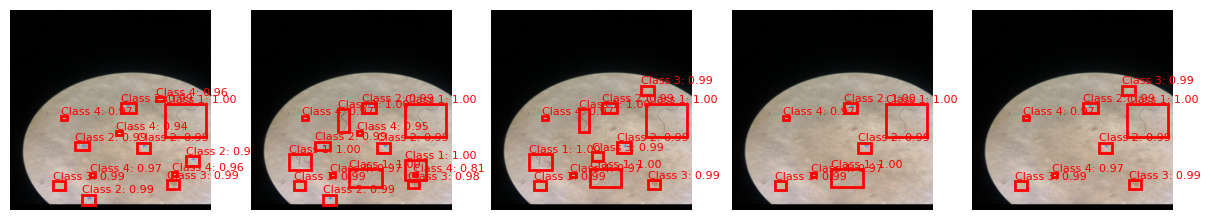

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

def visualize_predictions(model, dataloader, device, num_images=5, score_threshold=0.5):
    model.eval()  # Set model to evaluation mode
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))

    for i, (images, _) in enumerate(dataloader):
        if i >= num_images:
            break

        image = images[0].to(device)
        with torch.no_grad():
            prediction = model([image])

        image = image.cpu().permute(1, 2, 0).numpy()  # Convert image to NumPy format

        # Plot the image
        ax = axs[i] if num_images > 1 else axs
        ax.imshow(image)

        # Draw the bounding boxes
        boxes = prediction[0]['boxes'].cpu().numpy()
        labels = prediction[0]['labels'].cpu().numpy()
        scores = prediction[0]['scores'].cpu().numpy()

        for box, label, score in zip(boxes, labels, scores):
            if score > score_threshold:  # Filter predictions by confidence score
                x_min, y_min, x_max, y_max = box
                ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                           fill=False, edgecolor='red', linewidth=2))
                ax.text(x_min, y_min - 5, f'Class {label}: {score:.2f}', color='red', fontsize=8)

        ax.axis("off")

    plt.show()

# Run visualization
visualize_predictions(model, val_loader, device, num_images=5, score_threshold=0.5)


In [ ]:
import torch
import numpy as np
from collections import defaultdict
from tqdm import tqdm

def evaluate_metrics(model, dataloader, device, iou_threshold=0.5, score_threshold=0.5):
    model.eval()
    tp, fp, fn = 0, 0, 0
    iou_values = []

    for images, targets in tqdm(dataloader, desc="Evaluating"):
        images = [img.to(device) for img in images]

        with torch.no_grad():
            predictions = model(images)

        for i, prediction in enumerate(predictions):
            gt_boxes = targets[i]["boxes"].cpu().numpy()
            gt_labels = targets[i]["labels"].cpu().numpy()

            pred_boxes = prediction["boxes"].cpu().numpy()
            pred_scores = prediction["scores"].cpu().numpy()
            pred_labels = prediction["labels"].cpu().numpy()

            # Filter predictions based on confidence score
            mask = pred_scores > score_threshold
            pred_boxes, pred_labels = pred_boxes[mask], pred_labels[mask]

            matched_gt = set()  # Track matched GT boxes

            # Match predictions to ground truth
            for j, pred_box in enumerate(pred_boxes):
                max_iou, best_gt_idx = 0, -1

                for k, gt_box in enumerate(gt_boxes):
                    if k in matched_gt:
                        continue  # Skip already matched GT boxes

                    iou = compute_iou(gt_box, pred_box)
                    if iou > max_iou:
                        max_iou, best_gt_idx = iou, k

                if max_iou >= iou_threshold and best_gt_idx != -1:
                    tp += 1
                    iou_values.append(max_iou)
                    matched_gt.add(best_gt_idx)
                else:
                    fp += 1  # False positive (box predicted, but no match)

            # Count false negatives (GT not detected)
            fn += len(gt_boxes) - len(matched_gt)

    # Compute metrics
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if precision + recall > 0 else 0
    mean_ap = np.mean(iou_values) if iou_values else 0  # Approximate mAP

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}")
    print(f"mAP (mean IoU): {mean_ap:.4f}")

def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    inter_area = max(0, xB - xA) * max(0, yB - yA)
    boxA_area = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxB_area = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    iou = inter_area / (boxA_area + boxB_area - inter_area + 1e-6)  # Add epsilon to avoid division by zero
    return iou

# Run evaluation
evaluate_metrics(model, val_loader, device)


Evaluating: 100%|██████████| 20/20 [00:07<00:00,  2.73it/s]

Precision: 0.4568
Recall: 0.4646
F1-score: 0.4607
mAP (mean IoU): 0.8375


In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision
metric = MeanAveragePrecision(iou_type="bbox")
for imgs, targets in val_loader:
    preds = model([img.to(device) for img in imgs])
    metric.update(preds, targets)
print(metric.compute())   # gives map_50, map_75, map

OutOfMemoryError: CUDA out of memory. Tried to allocate 158.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 68.12 MiB is free. Process 253950 has 14.67 GiB memory in use. Of the allocated memory 14.34 GiB is allocated by PyTorch, and 207.00 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Source path (existing .pt file)
source_path = '/content/fasterrcnn_microplastics2.pt'

# Destination path (target location)
destination_path = '/content/drive/MyDrive'

# Copy the file
shutil.copy(source_path, destination_path)

print("File copied successfully.")

File copied successfully.


In [ ]:
# Fetch a batch from the dataloader
for images, targets in val_loader:
    print(targets[0]["labels"])  # Print class labels for the first image in batch
    break  # Only print once


tensor([2, 2, 2, 2, 1, 2, 3, 3, 4, 4, 4, 4], device='cuda:0')


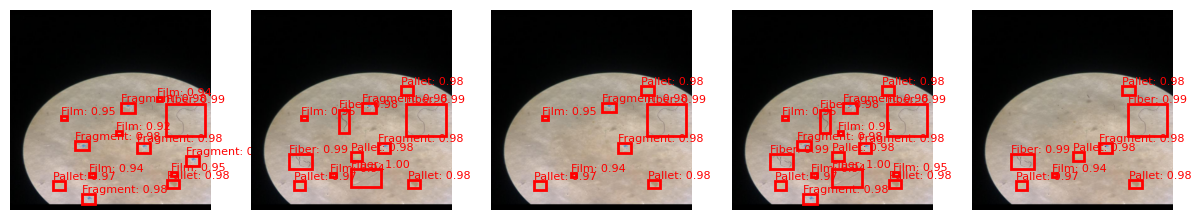

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

def visualize_predictions(model, dataloader, device, num_images=5, score_threshold=0.5):
    model.eval()  # Set model to evaluation mode
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))

    # Correct class label mapping
    class_names = {
        1: "Fiber",
        2: "Fragment",
        3: "Pallet",
        4: "Film"
    }

    for i, (images, _) in enumerate(dataloader):
        if i >= num_images:
            break

        image = images[0].to(device)
        with torch.no_grad():
            prediction = model([image])

        image = image.cpu().permute(1, 2, 0).numpy()  # Convert image to NumPy format

        # Plot the image
        ax = axs[i] if num_images > 1 else axs
        ax.imshow(image)

        # Draw the bounding boxes
        boxes = prediction[0]['boxes'].cpu().numpy()
        labels = prediction[0]['labels'].cpu().numpy()
        scores = prediction[0]['scores'].cpu().numpy()

        for box, label, score in zip(boxes, labels, scores):
            if score > score_threshold:  # Filter predictions by confidence score
                x_min, y_min, x_max, y_max = box
                ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                           fill=False, edgecolor='red', linewidth=2))
                class_name = class_names.get(label, f"Unknown {label}")  # Convert number to name
                ax.text(x_min, y_min - 5, f'{class_name}: {score:.2f}', color='red', fontsize=8)

        ax.axis("off")

    plt.show()

# Run visualization
visualize_predictions(model, val_loader, device, num_images=5, score_threshold=0.5)
